# 3. Data Modelling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
ames_df = pd.read_csv('../data/ames_df_dummied_train.csv')

In [3]:
ames_df.head()

,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,property_age
0,0,13517,2,4,1,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,1,34
1,43,11492,2,4,1,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,1,13
2,68,7922,1,4,1,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,1,57
3,73,9802,1,4,1,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,1,4
4,82,14235,2,4,1,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,1,110


## Model Prep: Create features matrix ( X ) and target vector ( y ) 

In [4]:
# Create features matrix (X) and target vector (y)
features = [col for col in ames_df._get_numeric_data().columns if col != 'saleprice']
X = ames_df[features]
y = ames_df['saleprice']

## Baseline Model

In [5]:
# Baseline Model - prediction for null model
baseline_preds = y.mean()
baseline_preds

177546.35420841683

In [6]:
# full dataset includes X_train + X_test
ames_df['baseline_preds'] = ames_df['saleprice'].mean()

In [7]:
# root mean square error
baseline_rmse = np.sqrt(metrics.mean_squared_error(ames_df['saleprice'], ames_df['baseline_preds']))
baseline_rmse

68353.36213533829

In [8]:
# drop 'baseline_preds'
ames_df.drop(['baseline_preds'], axis=1, inplace=True)

## Model Prep: Train/test split

In [9]:
# perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## Model Prep: Scaling

In [10]:
# perform scaling 
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Model 1: Linear Regression

In [11]:
# instantiate model
lr = LinearRegression()

In [12]:
# fit linear regression model
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
# train score for linear regression
lr.score(X_train, y_train)

0.9344373591113845

In [14]:
# cross val train score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

-3.577047395446428e+23

In [15]:
# test score for linear regression
lr.score(X_test, y_test)

-3.18779729006921e+21

The cross validation score and test score for the linear regression model is negative.

## Model 2: Ridge Regression

In [16]:
# instatiate model
ridge = RidgeCV (alphas=np.linspace(.1, 10, 100))

In [17]:
# perform cross validation using ridge regression
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5)
ridge_scores.mean()

0.8500846335924497

In [18]:
# optimal ridge
optimal_ridge = RidgeCV(cv=5)
optimal_ridge.fit(X_train, y_train)

optimal_ridge.alpha_

10.0

In [19]:
# perform cross validation using optimal alpha
ridge = RidgeCV (alphas=optimal_ridge.alpha_)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5)

In [20]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array(10.))

In [21]:
# ridge train score 
ridge.score(X_train, y_train)

0.9343030124903327

In [22]:
# ridge cross val train score
ridge_scores.mean()

0.8500846335924497

In [23]:
# ridge test score 
ridge.score(X_test, y_test)

0.7853277563100876

The difference between the ridge cross validation score and the ridge test score is 0.065.

## Model 3: Lasso Regression

In [24]:
# instantiate model
lasso = LassoCV(n_alphas=200)

In [25]:
# fit lasso model to train data
lasso.fit(X_train, y_train)

LassoCV(n_alphas=200)

In [26]:
# lasso train score
lasso.score(X_train, y_train)

0.9231701602750695

In [27]:
# perform cross validation using lasso regression
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
lasso_scores.mean()

0.8755191933524504

In [28]:
# lasso test score
lasso.score(X_test, y_test)

0.8084454499116965

The difference between the lasso cross validation score and the lasso test score is 0.0675.

## Model Evaluation

Since the ridge regression model has the smallest difference of 0.065 between cross validation score and test score, and the cross validation score is 0.850, this model will be chosen to predict our saleprice.

## Prediction of sale price

In [29]:
# predict sale price from x_test
y_pred = ridge.predict(X_test)

In [30]:
# R^2 score for test and predictions
r2_score(y_test, y_pred)

0.7853277563100876

The R2 score of 0.785 for the test and predicted sale price implies that 78.5% of the variability in y is explained by the x-variables in our model.

In [31]:
# residuals for test and predictions
residuals = y_test - y_pred

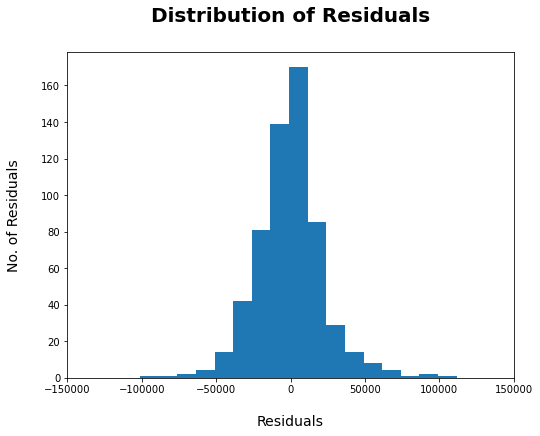

In [32]:
# histogram for distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50)

# set limits for x-axis
plt.xlim(-150000,150000)

#set title and x,y labels
plt.title("Distribution of Residuals", pad=30, weight='bold', size=20)
plt.xlabel('Residuals', labelpad=20, size=14)
plt.ylabel('No. of Residuals', labelpad=20, size=14);

The above histogram shows that the errors are normally distributed.

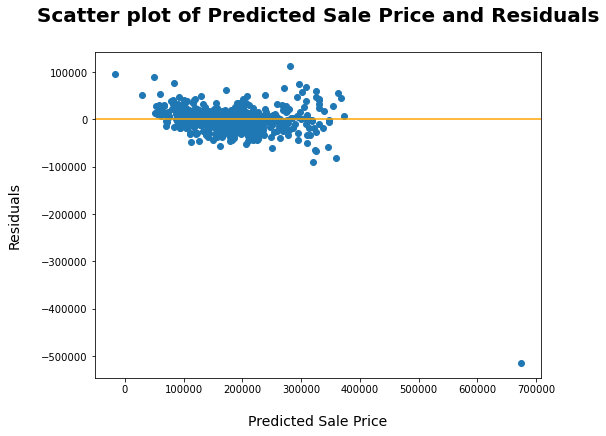

In [33]:
#scatter plot for predicted sale price and residuals
plt.figure(figsize=(8, 6))

#create scatter plot and horizontal line 
plt.scatter(y_pred, residuals);
plt.axhline(0, color='orange');

#set title and x,y labels
plt.title("Scatter plot of Predicted Sale Price and Residuals", pad=30, weight='bold', size=20)
plt.xlabel('Predicted Sale Price', labelpad=20, size=14)
plt.ylabel('Residuals', labelpad=20, size=14);

From the scatter plot of the predicted sale price and residuals, there is an equal variance of errors with the exception of a single outlier. 

From the above plots, the model satistfies the 5 assumptions of LINEM.
1. L - There is a linear relationship.
2. I - The errors are independent
3. N - The errors are normally distributed
4. E - There is an equal variance of errors
5. M - There is no multicollinearity

In [34]:
y_train.mean()

178493.38511095205

In [35]:
y_test.mean()

175337.6694490818

In [36]:
y_pred.mean()

176442.61491507676

In [37]:
y_pred.mean() - y_test.mean()

1104.9454659949697

Comparing the means of the y_test and y_pred, the difference is 1104. 

## Comparison of RMSE for Ridge Model and Null Model

In [38]:
# RMSE for null model
baseline_rmse

68353.36213533829

In [39]:
# RMSE for ridge model
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

30795.63591502156

The RMSE for the ridge model is 30,796 while the RMSE for the null model is 68,353. Therefore, the ridge model performs better than the null model in predicting the sale price. 

# 4. Conclusions and Recommendations

The Ridge Regression model is a good model to use to predict the sale price of properties in Ames. It would perform better than the baseline model since it has a lower RMSE score. However, the model performance can be improved by refining the features in the dataset. More analysis can be done to examine the collinearity between the features. Those that show high collinearity can be refined by dropping the feature that has lower colinearity to the sale price. 